In [1]:
rm(list = ls())
library(rjson)
library(tidyverse)
# https://github.com/codeforshinjuku/covid19
js0 = fromJSON(file = "patient.json")
js0 %>% class
js0 %>% names

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "list"

[1] "131016" "131024" "131032" "131041" "131059" "131067" "131075" "131083"
 [9] "131091" "131105" "131113" "131121" "131130" "131148" "131156" "131164"
[17] "131172" "131181" "131199" "131202" "131211" "131229" "131237" "132012"
[25] "132021" "132039" "132047" "132055" "132063" "132071" "132080" "132098"
[33] "132101" "132110" "132128" "132136" "132144" "132152" "132187" "132195"
[41] "132209" "132217" "132225" "132233" "132241" "132250" "132276" "132284"
[49] "132292" "133035" "133051" "133078" "133086" "133612" "133621" "133639"
[57] "133647" "133817" "133825" "134015" "134023" "134210"

In [11]:
library(repr)
options(repr.plot.width=20, repr.plot.height=8)

In [3]:
Unzip <- function(...) rbind(data.frame(), ...)
df0 = do.call(Unzip,js0)
df0 = df0 %>% mutate(code = rownames(df0))
lf0 = df0 %>% gather(key = Date , value = n_patient , - code ) 
lf0 = lf0 %>% mutate(Date = as.Date(Date , "X%Y.%m.%d") ,
                     code = as.integer((code)))

In [5]:
#tf = as.tibble(js0)
#iris.frame <- do.call(Unzip, iris.list)
library(readr)

In [6]:
if (F) {
  # https://ecitizen.jp/Sac/13
  region_code = read.csv("clipboard" , sep = "\t")
  
  region_code = region_code[2:4] 
  names(region_code) = c("code5" , "name" , "Kana" , "code")
  region_code = region_code %>% mutate(code = as.integer(code) , 
                                       code5 = as.integer(code5))
  write_tsv(region_code , "region_code.tsv")
  
  
}
if (F) {
  #http://note.omarukun.com/notes/4/
}
if (F){
  library(XML)
}

In [8]:
region_code = read_tsv("region_code.tsv") %>% mutate(code  =as.integer(code))

lf0 = lf0 %>% left_join(region_code)
lf0 %>% head
lf0 %>% dim
lf0 = lf0 %>% arrange(name, Date) %>% group_by(name) %>% mutate(diff7 = n_patient - lag(n_patient , 7)) %>% ungroup
library(ggrepel)
library(ggiraph)

g = ggplot(lf0 , aes(x = Date , y = n_patient , color = name , tooltip = name, data_id = name))  + 
    #geom_line() + 
    geom_line_interactive() +
    #geom_text_repel(data = lf0 %>% group_by(name) %>% filter(Date == max(Date)) %>% ungroup)+
    #geom_text_repel(data = lf0 %>% group_by(name) %>% filter(Date == max(Date)) %>% ungroup)+
    theme_minimal() + 
    scale_x_date(date_labels = "%m/%d") +
    #    expand_limits(x = as.Date("2020/8/1")) +
    guides(color = F)

In [15]:
?girafe

girafe {ggiraph},R Documentation
code,Plotting code to execute
ggobj,ggplot objet to print. argument code will be ignored if this argument is supplied.
pointsize,"the default pointsize of plotted text in pixels, default to 12."
"width_svg, height_svg",The width and height of the graphics region in inches. The default values are 6 and 5 inches. This will define the aspect ratio of the graphic as it will be used to define viewbox attribute of the SVG result.
options,"a list of options for girafe rendering, see opts_tooltip, opts_hover, opts_selection, ..."
...,arguments passed on to dsvg


In [13]:
library(IRdisplay)

In [24]:
girafe(ggobj = g , width = 20, height = 10)

HTML widgets cannot be represented in plain text (need html)

In [25]:
g = ggplot(lf0 , aes(x = Date , y = diff7 , color = name , tooltip = name, data_id = name))  + 
    #geom_line() + 
    geom_line_interactive() +
    theme_minimal() + 
    scale_x_date(date_labels = "%m/%d") +
    #    expand_limits(x = as.Date("2020/8/1")) +
    guides(color = F)



girafe(ggobj = g)

Warning message:
“Removed 434 row(s) containing missing values (geom_path).”


HTML widgets cannot be represented in plain text (need html)

In [4]:
if (F) {
# https://catalog.data.metro.tokyo.lg.jp/dataset/t000003d0000000039/resource/7c79272f-d3eb-434f-8e83-ab16409fe451
  df_pop = read.csv("clipboard" , sep = "\t")
  df_pop %>% head
  df_pop = df_pop %>% transmute_(code5 = "地域コード" , pop = "X2020年")
  df_pop %>% write_tsv("pop.tsv")
  
}

Parsed with column specification:
cols(
  code5 = col_double(),
  name = col_character(),
  Kana = col_character(),
  code = col_double()
)

Joining, by = "code"



,code,Date,n_patient,code5,name,Kana
,<int>,<date>,<dbl>,<dbl>,<chr>,<chr>
1,131016,2020-03-31,3,13101,千代田区,ちよだく
2,131024,2020-03-31,19,13102,中央区,ちゅうおうく
3,131032,2020-03-31,39,13103,港区,みなとく
4,131041,2020-03-31,22,13104,新宿区,しんじゅくく
5,131059,2020-03-31,4,13105,文京区,ぶんきょうく
6,131067,2020-03-31,15,13106,台東区,たいとうく


[1] 5890    6

Warning message:
“package ‘gdtools’ was built under R version 3.6.3”


HTML widgets cannot be represented in plain text (need html)

Warning message:
“Removed 434 row(s) containing missing values (geom_path).”


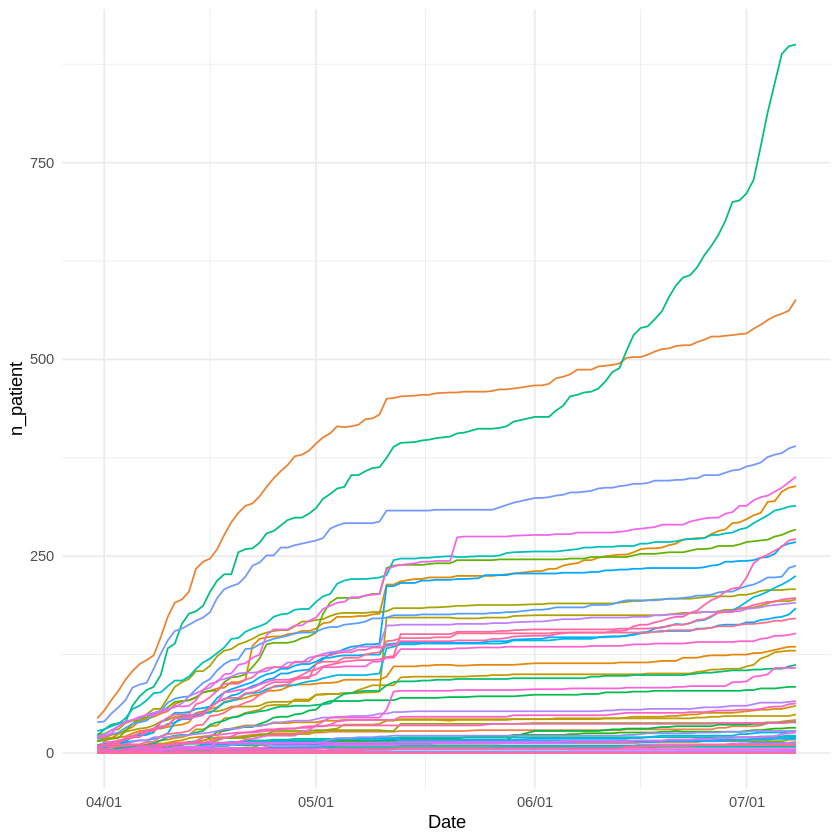

Warning message:
“Removed 434 row(s) containing missing values (geom_path).”


HTML widgets cannot be represented in plain text (need html)

Parsed with column specification:
cols(
  code5 = col_double(),
  pop = col_double()
)

Joining, by = "code5"



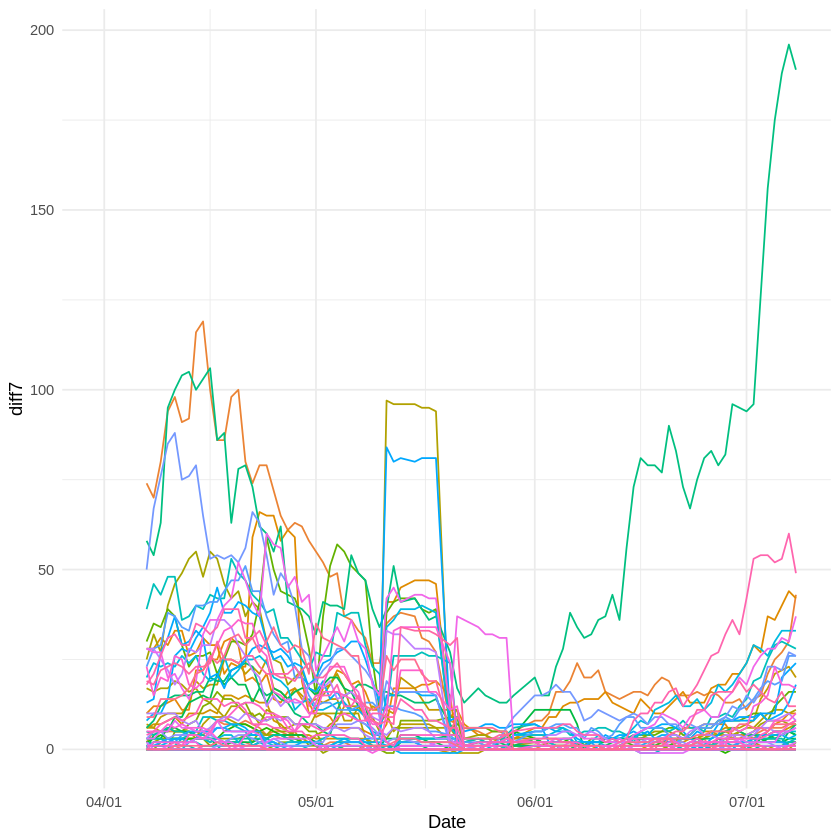

HTML widgets cannot be represented in plain text (need html)

Warning message:
“Removed 434 row(s) containing missing values (geom_path).”


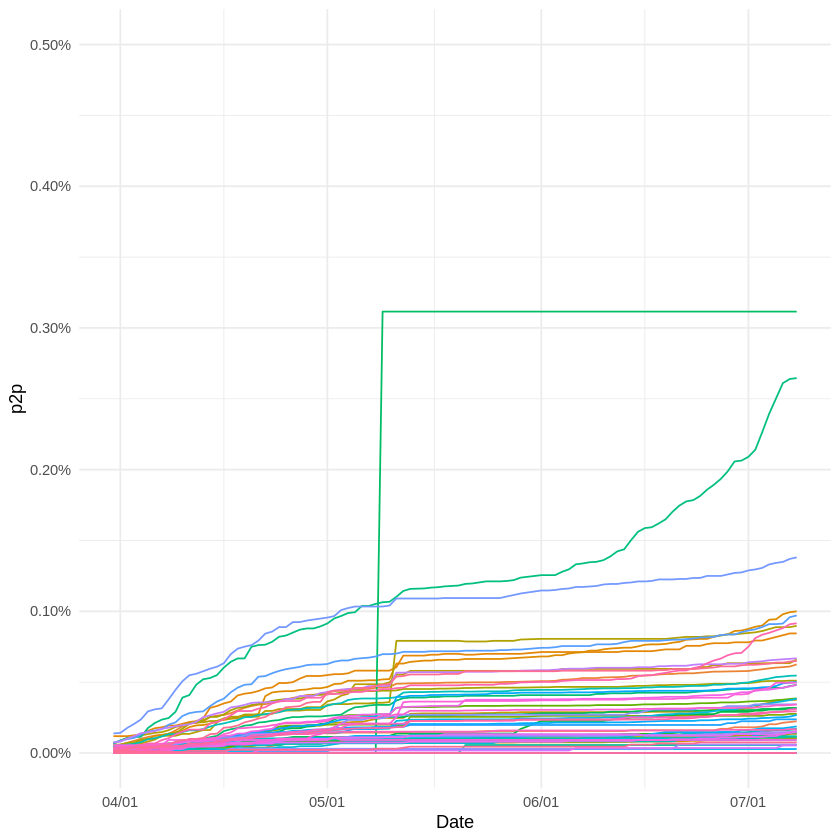

Warning message:
“Removed 434 row(s) containing missing values (geom_path).”


HTML widgets cannot be represented in plain text (need html)

ERROR: Error in library(leaflet): there is no package called ‘leaflet’


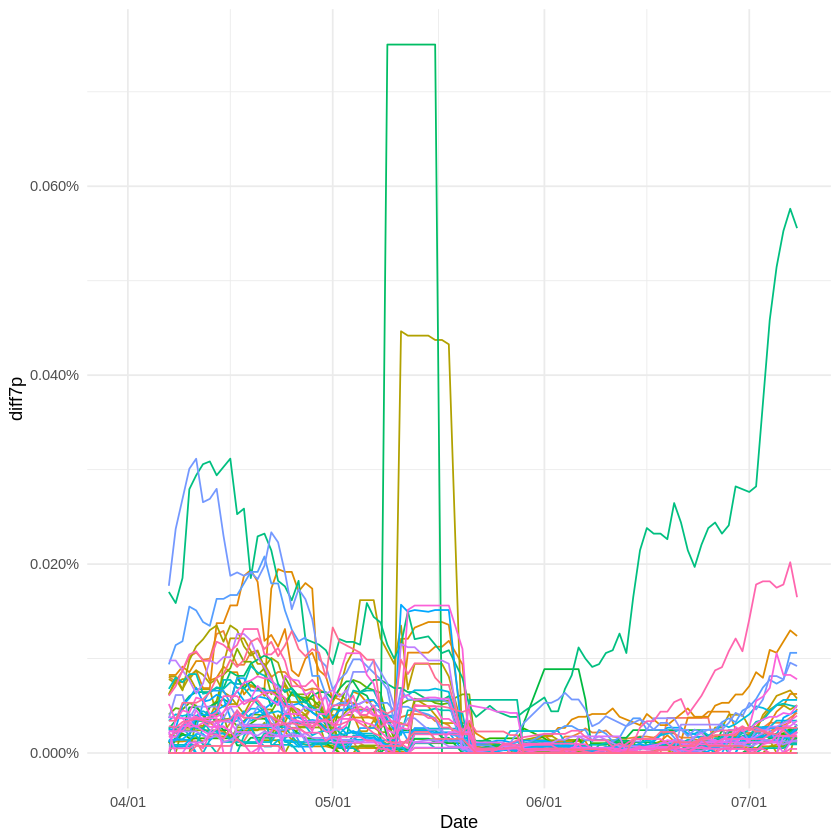

In [4]:
df_pop = read_tsv("pop.tsv")
lf0 = lf0 %>% left_join(df_pop)
lf0 = lf0 %>% mutate(p2p = n_patient / pop ,
                     diff7p = diff7 / pop)



(g = ggplot(lf0 , aes(x = Date , y = p2p , color = name , tooltip = name, data_id = name))  + 
    #geom_line() + 
    geom_line_interactive() +
    #geom_text_repel(data = lf0 %>% group_by(name) %>% filter(Date == max(Date)) %>% ungroup)+
    #geom_text_repel(data = lf0 %>% group_by(name) %>% filter(Date == max(Date)) %>% ungroup)+
    theme_minimal() + 
    scale_x_date(date_labels = "%m/%d") +
    scale_y_continuous(labels = scales::percent , limits = c(0,0.005) , oob = scales::squish) +
    #    expand_limits(x = as.Date("2020/8/1")) +
    guides(color = F))

girafe(ggobj = g)


(g = ggplot(lf0 , aes(x = Date , y = diff7p , color = name , tooltip = name, data_id = name))  + 
    #geom_line() + 
    geom_line_interactive() +
    theme_minimal() + 
    scale_x_date(date_labels = "%m/%d") +
    scale_y_continuous(labels = scales::percent , limits = c(0,0.00075) , oob = scales::squish) +
    #    expand_limits(x = as.Date("2020/8/1")) +
    guides(color = F))



girafe(ggobj = g)

library(leaflet)

map_dfr()